# **PHYS 481**
## **Assignment 1**
### **Josh Houghton**




---


## **Introduction**

---

Throughout this assignment, I was tasked with creating several Python programs to investigate several topics, such as randomization and random shuffling, reversible mixing, modular exponentiation, and integer factorization.

The first of these topics, random shuffling, was explored through creating a program that would take a list of integers, representing a deck of cards, and perform what is called a 'riffle shuffle'. As was taught in class, a riffle shuffle can be imagined in real life as a deck of cards being split in two equal halves, and then letting one card from each half fall on top of eachother. This however, is for one: not very realistic, as usually a deck of cards is not perfectly split in half when shuffling, and two: not very random. I was able to construct a much more generalized shuffling program that will take a deck of most sizes, and shuffle it regardless of where the deck was cut, within a given range.

After moving on from the shuffling problem, I moved on to the next task of investigating reversible mixing, through a mathematical concept known as Arnold's cat map. For the purpose of this assignment, the cat map was represented as a map that could be performed using an algorithm that, when applied to an image, would shuffle the pixels of said image. However, as was analyzed throughout this portion of my assignment, this map has a property that despite the fact that the pixels appear to be randomized, after a number of steps of the algorith, the original image will be resolved. With this in mind, I was able to create a program that performed a more generalized version of Arnold's cat map to an image, and compute some interesting results to explore cyclic shuffling processes.

It is important to note that one important part of the 'shuffling' performed in the cat map algorithm was heavily reliant on modular arithmetic. This type of arithmetic, which takes advantage of the mod operator, is very common in computer science, especially within the field of cryptography. It is this type of arithmetic that allowed me to tackle the third assignment problem, which was finding the order of integers using modular exponentiation, which was done by finding values of $r$ that satisfied

<center>$(a^r)$ mod $N$ = 1</center>

for a several values of $a$, over a large interval of $N$. After doing so, I was able to create plots of $r(N)$ for each integer $a$, to better visualize how the order $r$ scales with $N$.

Finally, the last problem of the assignment had me create a program to factor integers $N$, specifically all odd $N$ for $99900\ge N\ge 100000$. This task, for me anyway, proved to be the most difficult of the assignment. I ran in to several problems along the way, but eventually was able to get it running properly. As will be explained in more detail later in my assignment, there are several prime numbers within this range of $N$, which obviously have no non-trivial factors. For this reason, a completely generalized version of this method of factorization is *extremely* inefficient. For this reason, after making sure my code was running properly, I generalized it moreso towards the purpose that it  still performs properly for the purposes of this assignment, but could *technically* not work for much higher intervals of $N$.

Overall, this assignment looked at several different topics, although it is clear that in a way, they all build off one another. In the next several cells, I have broken my methodology, results, and discussion in to pieces, to more easily convey ideas related to each of the assignment problems.


## **Problem 1.1**



---
### **Methodology**


---
As stated earlier, the pupose of this first program is to shuffle a list of integers. In class, we went over several methods to do so, therefore a lot of the groundwork and initial ideas were already there when I coded this portion.

To begin, I built a simple program that was modelled after the example done in class; however, I did build it from scratch one piece at a time, just to make sure I understood how everything was working. The actual shuffling methods are explained throughout the code as comments, and were went over in class, so I will not dive into the specific methods here. What I will explain, is the modifications that I then made to *generalize* the shuffling program.

The first generalization that I made, was that instead of shuffling a predetermined sized list, the program first takes input from the user to set the deck size. This was just done to easily prove that the algorithm works for many different deck sizes.

The next, and probably most important generalization that I made, was to instead create an entire function for the shuffle, which I called bridge_shuf(deck, cut). Notice that this function not only takes the deck to be shuffled as an arguement, but also takes an arguement called cut. This arguement is an integer, which represents the index of the list for which the deck is cut at. This, as will be explained shortly, made it much simpler to create a more random looking final deck.

The third generalization that I made, which ties into the previous point that I just stated, was to call the function multiple times, each time cutting the deck at a different spot. To do so, I used a for loop that iterated over cards from a quarter of the deck to three quarters of the deck. Then, for each iteration of indices, the deck would be shuffled again, using the current index as the cut. This explains why I added the cut parameter, as for each iteration of the for loop, I could simply pass the value of the current iteration in to the function as the cut arguement. The reason that I only chose cut cards to be within a quarter and three quarters of the deck, is that choosing the cut card to be very close to either end of the deck results in a pretty small change to the overall list. Note that due to this, the program will return an error for decks of length 3 or lower.

My code for this problem is below, after running it you will be asked to enter a deck size. All of my code is commented with further explanations for each line and/or block.



### **Code**

In [ ]:
# This cell is a program that will take a "deck of cards" which is really just a list of
# integers, and shuffle it. The length of the deck of cards is specified by the user, and 
# theoretically could be as long as wanted, although larger decks would take a very long time.

import numpy as np
import matplotlib.pyplot as plt

# Defines a function that will shuffle a "deck" (list of integers)
# The function takes two arguements, deck and cut. The deck arguement is the list/deck
# that is to be shuffled. The cut arguement takes an integer representing where the
# deck will be split.
def bridge_shuf(deck, cut):
  # creating two new lists representing each side of the original deck based on the cut parameter
  leftDeck = deck[:-cut]
  rightDeck = deck[-cut:]

  # creates an empty list which will be used in the following loop
  deck_0 = []

  # initializing a loop that iterates over number specified for the cut
  for j in range(cut):

    # creates a new deck ranging from the integer value (rounded) of the difference between
    # the deck size and the number used for cut, multiplied by the current index of iteration
    # to that multiplied instead by the current iteration plus one
    deck_1 = leftDeck[j*int((deckSize - cut) / cut ) : (j+1)*int((deckSize - cut) / cut )]

    # adds the index of the second half of the split deck to the new deck based on
    # the current iteration
    deck_1 += [rightDeck[j]]

    # adds the placeholder deck to the deck_0 to complete the switch of cards for this iteration
    deck_0 += deck_1
 
  # adds the remainder of the original deck to the end of the new deck to complete
  # the current shuffle
  deck_0 += leftDeck[(j+1)*int((deckSize - cut) / cut ) : deckSize + 1]

  return deck_0





# initializes while loop that will run indefinitely 
while True == True:

  # try block that asks the user for input and if that input is able to be converted
  # to an integer, breaks out of the while loop
  try:
    deckSize = int(input("Enter your preferred deck size?"))
    break

  # if the input entered for the deck size cannot be converted to an integer and gives
  # a ValueError, an error message is printed and the while loop continues, so a new
  # number can be entered
  except ValueError:
    print("")
    print("Deck size needs to be a number. Please enter a new deck size.")
    print("")
    continue




# This block creates a list of integers from 1 to whatever deck size value is specified
# by the user
deck = []
for i in range(deckSize):
  deck += [i+1]

# prints the original unshuffled deck
print("\n Original Deck = ", deck)

# for loop that iterates over the range from one quarter of the deck to three quarters of the deck.
# This is because for smaller decks, anything outside that range wouldn't really change the deck a 
# whole lot. For each iteration, the shuffle function is called to shuffle the current deck, taking 
# the current iteration as the card where the deck is cut.
for indx in range( int((1/4)*deckSize), int((3/4)*deckSize)):
  deck = bridge_shuf(deck,indx)

# prints the shuffled deck
print('\n Shuffled deck = ', deck)

Enter your preferred deck size?436

 Original Deck =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211



### **Results & Discussion**



I found that the results of this program are pretty much as expected, and not very interesting. The deck is shuffled accordingly, and all of the methods that I explained in the previous section worked to succesfully make the program more general. 

There are however, two interesting results that I would like to discuss.

The first of which, is the fact that this shuffle is not *truly* random. This comes from the fact that everything the program was doing is dependant only on the deck itself. For example, a deck of 100 integers will always be shuffled in the same manner, and will also always be shuffled the same number of times. This result can obviously be picked out by running the program twice, picking the same deck size each time. As expected, I found that when shuffling decks of the same size, the result will always be the same.

The second result that I didn't really consider while *creating* the program, but became quite obvious after testing it, is the fact that the longer the deck size, the more shuffled the result will be. Now, I use the term "more shuffled" instead of random because once again, this deck is not truly random. What I mean by more shuffled comes from the part of my code that I mentioned earlier, where the deck is shufflled according to iterations through one quarter and three quarters of the deck. Clearly, for a much longer deck, there are many more cards in this interval which leads to the shuffle being performed more. For this reason, using very large deck sizes will result in the program takinga much longer time to compile the shuffled list.


## **Problem 2.1**



### **Methodology**


Similarly to the previous problem, a lot of the base work was already done, as we had two catmap functions to work with. 

Firstly, through testing, I found that the function that employed array indexing was faster, and for this reason, chose to use it in my code.

Once again, I will not dive to deep into the methods of the cat map function, as it was essentially already built, although I do explain how it works in the comments of the code. The only thing I really had to update was the equations within the catmap algorithm, to account for the new variables $p$, $q$, $r$, and $s$. I did this quite easily by adding those factors in to the equations as specified, and then setting them to be extra arguements in the catmap function. That was I could call the function for all 16 different combinations, and the results would be given.

To tackle the problem of determining the number of shuffle steps taken to restore the original image data, I defined another function called shuffle_count(p,q,r,s). Clearly, the only arguements it takes are the values for $p$, $q$, $r$, and $s$. When the function is called, it creates one variable to hold the original, unchanged data. It then applies the catmap function to this original data **once**, creates a variable newdat equal to this, and creates a counter that is set to 1. This is done in order to let the next part of the function work properly. 

The next line begins a while loop that iterates until the original data is the exact same as the current data. Since it already performed the catmap shuffle once, the data clearly is not the same, so the loop begins running. However, since it updated the data once before the loop I needed the counter to be set equal to 1 initally. Inside the while loop, newdat is repeadetly updated according to the algorithm, using the catmap function. Each time a shuffle step is performed, the count is updated by 1. This continues until either the condition of the while loop is met, which makes the program print the results of the current count (the number of steps taken to restore the data), or until the image data has had 360 shuffle steps applied, and the image has still not been resolved. In this case, a statement is printing to tell the user that the image is not resolved after 360 steps, and then the program breaks out of the while loop.

All that was left to do, was use nested for loops to call the shuffle count function 16 times, varying the integers $p$, $q$, $r$, and $s$ each time. When all is said and done, the program will print out results for each set of $p$, $q$, $r$, and $s$, either giving the number of shuffle steps taken to restore the image or explaining that the image was not resolved after 360 steps.


### **Code**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# defining catmap function modeled after catmap2 from the class material.
# this function takes the same square arguement, but also args for p,q,r, and s
def catmap(square,p,q,r,s):
  
  # creates two variables, nx and ny, that are set to the x and y sizes of the data we are looking at
  nx, ny = square.shape[0:2]
  # creates x and y using array indexing instead of loops, based on the previously set
  # size of the data nx and ny
  x, y = np.arange(nx), np.arange(ny)
  x, y = np.meshgrid(x, y, sparse=False, indexing= 'ij')
  # creates two more variables xx and yy. These are the two values returned by the equations of Arnold's cat map algorithm
  # depending on which parameters for p q r and s are used, the values are updated differently 
  xx = p*x + q*y
  yy = r*x + s*y

  # creates a result that is equal to the new location in the data determined by xx mod nx and yy mod ny
  result = square[xx % nx, yy % ny]

  return result # returns this result so every time this function is called and set equal to something, the image is updated

# defining function to check how many iterations it takes for one full cycle of pixel shuffling
def shuffle_count(p,q,r,s):
  # createing two variables, olddat and newdat. olddat will just contain the original image data
  # newdat takes the the old data and performed one shuffle step
  olddat = np.array(img)
  newdat = catmap(olddat,p,q,r,s)

  # setting count = 1 to account for the first shuffle above
  count = 1

  # while loop that runs until the old data and new data are the same
  while np.array_equiv(newdat, olddat) == False:
    # updates the new data according to the catmap function
    newdat = catmap(newdat,p,q,r,s)
    # updates the count by 1 to keep track of how many shuffle steps have occured
    count += 1

    # if the count reaches the max of 360 steps, the loop ends and prints a statement saying so,
    # and the fucntion's action is complete
    if count > 360:
      print("When (p, q, r, s) =",(p,q,r,s), "the image is not restored after 360 shuffle steps.")
      print("")
      return

  # if the while loop runs until the two sets of data are equivalent a statement is
  # printed which reads the number of shuffle steps taken to restore the data to it's original form
  # for the specific values of p q r s that were used.
  print("When (p, q, r, s) =",(p,q,r,s), "the image is restored after",count,"shuffle steps.")
  print("")






# loading in cat image
from PIL import Image
import requests
from io import BytesIO
image_url = "https://www.jasondavies.com/catmap/catmap.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))




# testing all possible variations of p q r s using for loops and printing results
print("Results")
print("")
print("------------------------------------")
print("")
for one in range(1,3):
  for two in range(1,3):
    for three in range(1,3):
      for four in range(1,3):
        shuffle_count(one,two,three,four)

Results

------------------------------------

When (p, q, r, s) = (1, 1, 1, 1) the image is not restored after 360 shuffle steps.

When (p, q, r, s) = (1, 1, 1, 2) the image is restored after 348 shuffle steps.

When (p, q, r, s) = (1, 1, 2, 1) the image is restored after 40 shuffle steps.

When (p, q, r, s) = (1, 1, 2, 2) the image is not restored after 360 shuffle steps.

When (p, q, r, s) = (1, 2, 1, 1) the image is restored after 40 shuffle steps.

When (p, q, r, s) = (1, 2, 1, 2) the image is not restored after 360 shuffle steps.

When (p, q, r, s) = (1, 2, 2, 1) the image is not restored after 360 shuffle steps.

When (p, q, r, s) = (1, 2, 2, 2) the image is not restored after 360 shuffle steps.

When (p, q, r, s) = (2, 1, 1, 1) the image is restored after 348 shuffle steps.

When (p, q, r, s) = (2, 1, 1, 2) the image is not restored after 360 shuffle steps.

When (p, q, r, s) = (2, 1, 2, 1) the image is not restored after 360 shuffle steps.

When (p, q, r, s) = (2, 1, 2, 2) the




### **Results**

Clearly, as can be seen in the printed results, only 4 of the 16 combinations of $p$, $q$, $r$, and $s$ resulted in the image data being resolved after 360 shuffle steps.

I go deeper into discussion of the meaning behind this in the discussion for problem 2.2.








## **Problem 2.2**




### **Methodology**


After completing the previous problem, I wrote a routine to carry out $n$ multiplications of a matrix with itself, to see if there was a value of $n$ for which the identity matrix was returned.

First, note that the initial matrix used was the same of that in the previous question, defined by $p$, $q$, $r$, and $s$, so again, in the end there was 16 combinations and 16 results.

Do do this problem, I first defined a function called identity_count which took arguements of $p$, $q$, $r$, and $s$, as well as a fifth arguement $N$. For the purpose of this problem $N$ was always 354, the x and y size of the image data from the previous problem, so that the results could be compared. I only added it as arguement to further generalize the problem; theoretically, this could be used to test images of other sizes.

The function is actually quite simple, and similar in nature to the shuffle_count() function in the previous problem. First it creates two arrays I and M, which represent the identity matrix, and the matrix containing $p$, $q$, $r$, and $s$. It also creates a third matrix, new_M, that is identical to that of the $p$, $q$, $r$, $s$ matrix. A variable $n$ is also then created and set equal to 1 to represent the count. This is due to the fact that before the matrix is multiplied by itself, it is still technically a matrix to the power of 1.

After everything is initialized, a while loop similar to the one used in the previous problem is started, which runs indefinitely under the condition that the matrix of interest is not equal to the identity matrix.

For each loop, new_M is updated by taking the current new_M, multiplied by our original matrix of interest, mod N. The count is also updated after each step to reflect the number of steps taken. Similarly, the program breaks out of the while loop if the count reaches 360. If new_M eventually is equal to the identity matrix, the condition for the while loop to stop has been reached, and a message is printed stating the number of steps taken.


### **Code**

In [ ]:
import numpy as np

def identity_count(p,q,r,s,N):

  global n
  I = np.array( [[1,0] , [0,1]] )
  M = np.array( [[p,q] , [r,s]] )

  new_M = np.array( [[p,q] , [r,s]] )
  n = 1

  while np.array_equiv(new_M,I) == False:
    new_M = (np.matmul(new_M,M)) % N

    n += 1
    if n >= 360:
      break

  if n >= 360:
    print("When (p, q, r, s) =",(p,q,r,s), "the identity matrix has still not been reached when n = 360.")
    print("")

  else:
    print("When (p, q, r, s) =",(p,q,r,s), "the identity matrix is returned when n =", n)
    print("")

print("Results")
print("")
print("------------------------------------")
print("")
for one in range(1,3):
  for two in range(1,3):
    for three in range(1,3):
      for four in range(1,3):
        identity_count(one,two,three,four,354)

Results

------------------------------------

When (p, q, r, s) = (1, 1, 1, 1) the identity matrix has still not been reached when n = 360.

When (p, q, r, s) = (1, 1, 1, 2) the identity matrix is returned when n = 348

When (p, q, r, s) = (1, 1, 2, 1) the identity matrix is returned when n = 40

When (p, q, r, s) = (1, 1, 2, 2) the identity matrix has still not been reached when n = 360.

When (p, q, r, s) = (1, 2, 1, 1) the identity matrix is returned when n = 40

When (p, q, r, s) = (1, 2, 1, 2) the identity matrix has still not been reached when n = 360.

When (p, q, r, s) = (1, 2, 2, 1) the identity matrix has still not been reached when n = 360.

When (p, q, r, s) = (1, 2, 2, 2) the identity matrix has still not been reached when n = 360.

When (p, q, r, s) = (2, 1, 1, 1) the identity matrix is returned when n = 348

When (p, q, r, s) = (2, 1, 1, 2) the identity matrix has still not been reached when n = 360.

When (p, q, r, s) = (2, 1, 2, 1) the identity matrix has still not be

To test whether or not the results differ when the count is allowed to go past 360 steps, used the following code.

It is exactly the same as the previous program, the only difference is that the count is allowed to go all the way up to 100,000.

In [ ]:
# Same exact code as above, but with n max changed to 100,000

import numpy as np

def identity_count(p,q,r,s,N):

  global n
  I = np.array( [[1,0] , [0,1]] )
  M = np.array( [[p,q] , [r,s]] )

  new_M = np.array( [[p,q] , [r,s]] )
  n = 1

  while np.array_equiv(new_M,I) == False:
    new_M = (np.matmul(new_M,M)) % 354

    n += 1
    if n >= 100000:
      break

  if n >= 100000:
    print("When (p, q, r, s) =",(p,q,r,s), "the identity matrix has still not been reached when n = 100,000.")
    print("")

  else:
    print("When (p, q, r, s) =",(p,q,r,s), "the identity matrix is returned when n =", n)
    print("")

print("Results")
print("")
print("------------------------------------")
print("")
for one in range(1,3):
  for two in range(1,3):
    for three in range(1,3):
      for four in range(1,3):
        identity_count(one,two,three,four,354)

Results

------------------------------------

When (p, q, r, s) = (1, 1, 1, 1) the identity matrix has still not been reached when n = 100,000.

When (p, q, r, s) = (1, 1, 1, 2) the identity matrix is returned when n = 348

When (p, q, r, s) = (1, 1, 2, 1) the identity matrix is returned when n = 40

When (p, q, r, s) = (1, 1, 2, 2) the identity matrix has still not been reached when n = 100,000.

When (p, q, r, s) = (1, 2, 1, 1) the identity matrix is returned when n = 40

When (p, q, r, s) = (1, 2, 1, 2) the identity matrix has still not been reached when n = 100,000.

When (p, q, r, s) = (1, 2, 2, 1) the identity matrix has still not been reached when n = 100,000.

When (p, q, r, s) = (1, 2, 2, 2) the identity matrix has still not been reached when n = 100,000.

When (p, q, r, s) = (2, 1, 1, 1) the identity matrix is returned when n = 348

When (p, q, r, s) = (2, 1, 1, 2) the identity matrix has still not been reached when n = 100,000.

When (p, q, r, s) = (2, 1, 2, 1) the identity





### **Results & Discussion**



It is clear to see from the printed results for this problem are identical to those of the catmap problem.

From this, I infer that the catmap algorithm is in a sense doing the exact same thing. Obviously, the catmap version of this problem uses the image data, however the underlying math is the same. The equations for the catmap algorithm can be represented as the same matrices used in this problem, and when cycling through all the shuffle steps, eventually, the identity matrix is returned. When this occurs, it results in the state of the image data being completely returned to it's initial state, and therefore the image is resolved!

Note that in testing this code for extremely large maxima for the number of shuffle steps allowed, I found the results to be identical. From this, I am under the assumption that the identity matrix will never be returned for those values of $p$, $q$, $r$, and $s$. Therefore I will also assume that for the values of $p$, $q$, $r$, and $s$ that did not return the identity matrix, the catmap algorithm using those same values is not actually a valid version of Arnold's catmap.


## **Problem 2.3**




### **Methodology**



For this problem, I was tasked with creating a program that would find the order of $a$, for 9 different values of $a$, according to the equation stated in the introduction. I was also tasked with plotting these orders, $r$, versus $N$ for each integer $a$, which was done simply using lists and matplotlib.pyplot.subplots.

This program is actually quite simple, and only really lengthened by the plotting instructions. I first used two for loops to cycle through all the necessary values of $a$ and $N$. Within each loop for $N$, a variable $r$ that will represent the order is set to 1. 

After this, I initalized a while loop to iterate indefinitely. Within the loop, I first update r by adding one (this is done first as $r$ must be positive). Then I create a variable called result that is equal to $(a^r)$ mod $N$. If this result is equal to 1, then the current $r$ is the order of the current $a$. Hence, if this condition is met, the program appends $r$ and $N$ to their respective lists, just for plotting purposes, and breaks out of the current while loop, moving on to the next value of $N$. If the result is not equal to 1 however, the loop continues, first checking if $r$ is greater than or equal to 1000. If not, the loop restarts, updating $r$ by adding 1, and continuing the process. I added the condition that $r$ not go past 1000, because in testing, I came to the conclusion that certain $a$ values do not have an order $r$ for certain $N$ values. If this was the case, I just appended None to the list for $r$ to represent this fact.

Within the for loop that loops over $a$, I also included plotting instructions, such that we could see 9 different plots with the results, which are contained in the lists for r and N.


### **Code**

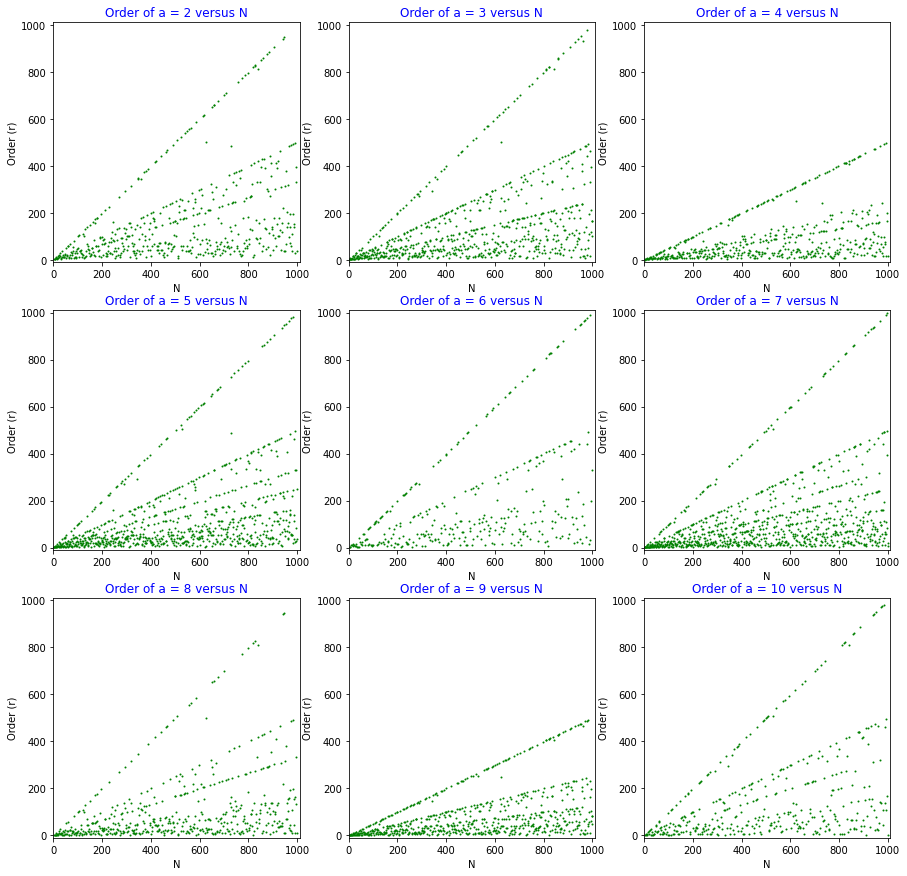

In [ ]:
# order finding

import numpy as np
import matplotlib.pyplot as plt

r_list = []
N_list = []

fig, ax = plt.subplots(3,3,figsize=(15,15))
[axi.set_axis_off() for axi in ax.ravel()]

for a in range(2,11):
  r_list = []
  N_list = []

  for N in range(1,1001):
    r = 0

    while True == True:
      r += 1
      result = (a**r) % N

      if result == 1:
        r_list += [r]
        N_list += [N]
        break
      
      elif r >=1000:
        r_list += [None]
        N_list += [N]
        break
  
  
  
  ax = fig.add_subplot(3, 3, a-1)
  ax.plot(N_list,r_list, 'go', markersize =1)
  plt.xlabel("N")
  plt.ylabel("Order (r)")
  plt.title("Order of a = "+str(a)+" versus N",fontsize=12,color='blue')
  plt.xlim(0,1010)
  plt.ylim(-10,1010)

  




### **Results & Discussion**



After running the code, we are left with 9 plots, one for each value of $a$. Each of these plots is of the order $r$ as a function of $N$ for the specified integer $a$. 

Since we are iterating through so many $N$ values, the graphs are a bit clustered, and it is hard to pick out any microscopic details.

However, *macroscopically* we can clearly see that in each of the graphs, there is a positive linear trend of $r$ as $N$ increases. Not only does $r$ on average, appear to increase with $N$, but there are some very prominent linear relationships embedded within the data.

Another thing to note is that there appears to be a common pattern for a number of $N$ values. Specifically, in all of the plots except for $a = 4, 9$ there is a linear relation for certain values of $N$, where $r$ = $N$. For $a = 4, 9$, there is a similar relation but this time relating to $r = N/2$.

I suspect that this detail may be related to the fact that 4 and 9 are both perfect squares.


## **Problem 2.4**



### **Methodology**



The logic used for this problem was done by following the step by step guide in the assignment details, but I will stil explain a few of my generalizations.

I first definied a function to check if the $N$ could be expressed as a power of integers. This was done just for ease, so I could call the function within my actual code, and was created using the properties of logs.

I also defined a function to find the greatest common denominator between two integers, using Euclid's algorithm, which was quite simple after reading a bit on the algorithm itself.

I also defined a function to be used to take a number to a high power and take the mod of it. This was really only used for testing purposes, but I have left it in my code for the sake of generalization.

The main body of my code follows step by step the integer factorization method specified in the assignment.

Essentially all the code is doing is initializing a for loop that runs through all odd numbers in the specified range. Within the for loop, there are several conditionals to check if one of the steps in the algorithm returns a valid factor. If one of the conditions is met, we have a factor, and we can simply print this factor for the current $N$. If none the conditions are met, we assume that the number is prime, and a message is printed to reflect this.


### **Code**

In [ ]:
from math import *

def powerCheck(N):
  if N == 1:
    return True
  for i in range(2, int(sqrt(N)) + 1) :
    b = log(N) / log(i)
    if (round((b - int(b)),8) < 0.00000000000001):
      return i
  return False

def gcd(a, b):
  if b == 0:
    return a
  else:
    rem = a % b
    return gcd(b, rem)

def power_mod(a,x,m):
  if x == 0:
    return 1
  elif x == 1:
    return a % m
  else:
    root = power_mod(a, x // 2, m)
    if x % 2 == 0:
      return (root * root) % m
    else:
      return (root * root * a) % m



for N in range(99901,100001,2):
  factor = None
  
  #step 1
  if N % 2 == 0:
    factor = 2
    print("A factor of",N,"is:",factor)
    continue

  # step 2
  if powerCheck(N) != False:
    factor = powerCheck(N)
    print("A factor of",N,"is:",factor)
    continue

  # step 3
  for a in range(3,N-2,1):
    
    if gcd(a,N) != 1:
      factor = int(gcd(a,N))
      print("A factor of",N,"is:",factor)
      break
  
    #step 4
  if factor == None:
    for a in range(3,N-2,1):
      r = 1
      while r <= 1000:
        r += 1
        result = (a**r) % N

        if result == 1:
          if r % 2 != 0:
            break
          
          elif r % 2 == 0:
        
            
            if power_mod(a, r/2, N) == -1 or power_mod(a, r/2, N) == (N-1) % N:
              break
            else:
              plus = gcd( a**(r/2) + 1 , N )
              minus = gcd( a**(r/2) - 1 , N )
              if type(plus) == int:
                factor = plus
                print("A factor of",N,"is:",factor)
                break
              elif type(minus) == int:
                factor = minus
                print("A factor of",N,"is:",factor)
                break
              else:
                break
  
  if factor == None:
    print("No factors found, therefore",N,"is a prime number!")

# Realistically, r should be able to go beyond 100, 
# but it works for this example, I just did it to cut down on execution time

# Notice that the GCD step seems to do most of the computing

No factors found, therefore 99901 is a prime number!
A factor of 99903 is: 3
A factor of 99905 is: 5
No factors found, therefore 99907 is a prime number!
A factor of 99909 is: 3
A factor of 99911 is: 7
A factor of 99913 is: 11
A factor of 99915 is: 3
A factor of 99917 is: 41
A factor of 99919 is: 163
A factor of 99921 is: 3
No factors found, therefore 99923 is a prime number!
A factor of 99925 is: 5
A factor of 99927 is: 3
No factors found, therefore 99929 is a prime number!
A factor of 99931 is: 13
A factor of 99933 is: 3
A factor of 99935 is: 5
A factor of 99937 is: 37
A factor of 99939 is: 3
A factor of 99941 is: 139
A factor of 99943 is: 17
A factor of 99945 is: 3
A factor of 99947 is: 89
A factor of 99949 is: 127
A factor of 99951 is: 3
A factor of 99953 is: 7
A factor of 99955 is: 5
A factor of 99957 is: 3
A factor of 99959 is: 19
No factors found, therefore 99961 is a prime number!
A factor of 99963 is: 3
A factor of 99965 is: 5
A factor of 99967 is: 7
A factor of 99969 is: 3
No




### **Results & Discussion**


After checking all of these results, I found that all statements were true in regards to both the factors, and prime numbers.

Therefore I deduced that everything is working properly.

Realistically, the program should cycle through many more $r$ values to continue checking for factors, but this is where this algorithm gets extremely infeffiecient. Since it works for the specified interval, I have left it as is, but if a different interval was used, specifically one with higher integers, the code would need more generalization.
